<a href="https://colab.research.google.com/github/SowjanyaKiran/IMDb-Rating-Prediction_sowjanya/blob/main/Mini_Project_IMDb_Rating_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [183]:
#importing the dataset
df=pd.read_csv('/content/drive/MyDrive/CNN_Dataset/shows.csv.zip')
df.head()

,rank,show_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
0,1,tt5491994,Planet Earth II,2016,https://www.imdb.com/title/tt5491994,"145,597",9.5,TV-G,4h 58m,Documentary,...,"nm1565498,nm3482115,nm4830788,nm1769336,nm2139...","Justin Anderson,Ed Charles,Fredi Devas,Chadden...",nm2357454,Elizabeth White,David Attenborough returns with a new wildlife...,"ur0362356,ur33816519,ur64238818,ur69264448,ur2...","Wentloog,john-m-madsen,thespookybuz,pjdickinso...","rw3575992,rw3576144,rw3578121,rw3576211,rw3577...","At once awe-inspiring and terrifying!,Yet anot...",I have just finished watching the first episod...
1,2,tt0903747,Breaking Bad,2008,https://www.imdb.com/title/tt0903747,"1,881,190",9.5,TV-MA,49m,"Crime,Drama,Thriller",...,"nm0533713,nm0002835,nm0319213,nm0118778,nm0806...","Michelle MacLaren,Adam Bernstein,Vince Gilliga...","nm0319213,nm0332467,nm2297407,nm1028558,nm0909...","Vince Gilligan,Peter Gould,George Mastras,Sam ...",A chemistry teacher diagnosed with inoperable ...,"ur128165243,ur6387867,ur158768880,ur20552756,u...","FiRE010,Supermanfan-13,Lukasmj,TheLittleSongbi...","rw7088846,rw7530139,rw8672131,rw3856786,rw8725...","Really Great,Damn near perfect!,A show you nee...",I have never watched a show that is as consist...
2,3,tt0795176,Planet Earth,2006,https://www.imdb.com/title/tt0795176,"210,164",9.4,TV-PG,8h 58m,Documentary,...,"nm0288144,nm1768412","Alastair Fothergill,Mark Linfield","nm0041003,nm1761192,nm0288144,nm0662263","David Attenborough,Vanessa Berlowitz,Alastair ...",Each 50 minute episode features a global overv...,"ur4445210,ur1002035,ur4344459,ur14156906,ur141...","ccthemovieman-1,bob the moo,bs3dc,robert-kamer...","rw2002220,rw1356723,rw1574512,rw1594404,rw1723...","In A Word: Amazing,A visually impressive and m...","Thankfully, I caught a couple of these episode..."
3,4,tt0185906,Band of Brothers,2001,https://www.imdb.com/title/tt0185906,"469,081",9.4,TV-MA,9h 54m,"Drama,History,War",...,"nm0291205,nm0004121,nm0000158,nm0500896,nm0518...","David Frankel,Mikael Salomon,Tom Hanks,David L...","nm0024421,nm0096897,nm0296861,nm0000158,nm0420...","Stephen Ambrose,Erik Bork,E. Max Frye,Tom Hank...",The story of Easy Company of the U.S. Army 101...,"ur0312444,ur3922673,ur1019294,ur6387867,ur2467...","rbverhoef,philip_vanderveken,bsmith5552,Superm...","rw0626026,rw0626132,rw0625888,rw8123519,rw3248...","Excellent,This series is so unbelievably reali...",This week I saw three things based on WW-II no...
4,5,tt7366338,Chernobyl,2019,https://www.imdb.com/title/tt7366338,"751,884",9.4,TV-MA,5h 30m,"Drama,History,Thriller",...,nm0719307,Johan Renck,nm0563301,Craig Mazin,"In April 1986, an explosion at the Chernobyl n...","ur0482513,ur71468234,ur6387867,ur115536310,ur1...","Leofwine_draca,jfirebug,Supermanfan-13,DiCapri...","rw5285929,rw4875873,rw8325723,rw8574390,rw8521...","Exemplary,Incredible,Brilliant!,Must Watch!,Pa...",CHERNOBYL is an excellent depiction of the inf...


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            250 non-null    int64  
 1   show_id         250 non-null    object 
 2   title           250 non-null    object 
 3   year            250 non-null    int64  
 4   link            250 non-null    object 
 5   imbd_votes      250 non-null    object 
 6   imbd_rating     250 non-null    float64
 7   certificate     246 non-null    object 
 8   duration        249 non-null    object 
 9   genre           250 non-null    object 
 10  cast_id         250 non-null    object 
 11  cast_name       250 non-null    object 
 12  director_id     250 non-null    object 
 13  director_name   250 non-null    object 
 14  writer_id       250 non-null    object 
 15  writer_name     250 non-null    object 
 16  storyline       250 non-null    object 
 17  user_id         250 non-null    obj

In [185]:
#checking whether is there any null values
df.isnull().sum()

,0
rank,0
show_id,0
title,0
year,0
link,0
imbd_votes,0
imbd_rating,0
certificate,4
duration,1
genre,0


In [186]:
# Getting an idea whether there are any missing values in the data or not
df.isnull().sum().any()

np.True_

In [187]:
#Getting an idea about the shape of the data
print('Shape :', df.shape)
print('Rows :', df.shape[0])
print('Columns :', df.shape[1])

Shape : (250, 22)
Rows : 250
Columns : 22


In [188]:
#Checking the duplicate in the data
df.duplicated().sum()

np.int64(0)

In [189]:
#Fixing the "imbd_votes" : remove commas and converting to numbers
df['imbd_votes'] = df['imbd_votes'].astype(str).str.replace(',', '').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            250 non-null    int64  
 1   show_id         250 non-null    object 
 2   title           250 non-null    object 
 3   year            250 non-null    int64  
 4   link            250 non-null    object 
 5   imbd_votes      250 non-null    int64  
 6   imbd_rating     250 non-null    float64
 7   certificate     246 non-null    object 
 8   duration        249 non-null    object 
 9   genre           250 non-null    object 
 10  cast_id         250 non-null    object 
 11  cast_name       250 non-null    object 
 12  director_id     250 non-null    object 
 13  director_name   250 non-null    object 
 14  writer_id       250 non-null    object 
 15  writer_name     250 non-null    object 
 16  storyline       250 non-null    object 
 17  user_id         250 non-null    obj

In [190]:
# Fixing the duration column
def convert_duration(duration):
    if pd.isnull(duration):
        return None
    duration = str(duration)  # Convert to string to avoid TypeError
    hours = 0
    minutes = 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
    if 'm' in duration:
        minutes = int(duration.split('m')[0].split('h')[-1])
    return hours * 60 + minutes

In [191]:
# Driver Code
df['duration_minutes'] = df['duration'].apply(convert_duration)
df.head()

,rank,show_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content,duration_minutes
0,1,tt5491994,Planet Earth II,2016,https://www.imdb.com/title/tt5491994,145597,9.5,TV-G,4h 58m,Documentary,...,"Justin Anderson,Ed Charles,Fredi Devas,Chadden...",nm2357454,Elizabeth White,David Attenborough returns with a new wildlife...,"ur0362356,ur33816519,ur64238818,ur69264448,ur2...","Wentloog,john-m-madsen,thespookybuz,pjdickinso...","rw3575992,rw3576144,rw3578121,rw3576211,rw3577...","At once awe-inspiring and terrifying!,Yet anot...",I have just finished watching the first episod...,298.0
1,2,tt0903747,Breaking Bad,2008,https://www.imdb.com/title/tt0903747,1881190,9.5,TV-MA,49m,"Crime,Drama,Thriller",...,"Michelle MacLaren,Adam Bernstein,Vince Gilliga...","nm0319213,nm0332467,nm2297407,nm1028558,nm0909...","Vince Gilligan,Peter Gould,George Mastras,Sam ...",A chemistry teacher diagnosed with inoperable ...,"ur128165243,ur6387867,ur158768880,ur20552756,u...","FiRE010,Supermanfan-13,Lukasmj,TheLittleSongbi...","rw7088846,rw7530139,rw8672131,rw3856786,rw8725...","Really Great,Damn near perfect!,A show you nee...",I have never watched a show that is as consist...,49.0
2,3,tt0795176,Planet Earth,2006,https://www.imdb.com/title/tt0795176,210164,9.4,TV-PG,8h 58m,Documentary,...,"Alastair Fothergill,Mark Linfield","nm0041003,nm1761192,nm0288144,nm0662263","David Attenborough,Vanessa Berlowitz,Alastair ...",Each 50 minute episode features a global overv...,"ur4445210,ur1002035,ur4344459,ur14156906,ur141...","ccthemovieman-1,bob the moo,bs3dc,robert-kamer...","rw2002220,rw1356723,rw1574512,rw1594404,rw1723...","In A Word: Amazing,A visually impressive and m...","Thankfully, I caught a couple of these episode...",538.0
3,4,tt0185906,Band of Brothers,2001,https://www.imdb.com/title/tt0185906,469081,9.4,TV-MA,9h 54m,"Drama,History,War",...,"David Frankel,Mikael Salomon,Tom Hanks,David L...","nm0024421,nm0096897,nm0296861,nm0000158,nm0420...","Stephen Ambrose,Erik Bork,E. Max Frye,Tom Hank...",The story of Easy Company of the U.S. Army 101...,"ur0312444,ur3922673,ur1019294,ur6387867,ur2467...","rbverhoef,philip_vanderveken,bsmith5552,Superm...","rw0626026,rw0626132,rw0625888,rw8123519,rw3248...","Excellent,This series is so unbelievably reali...",This week I saw three things based on WW-II no...,594.0
4,5,tt7366338,Chernobyl,2019,https://www.imdb.com/title/tt7366338,751884,9.4,TV-MA,5h 30m,"Drama,History,Thriller",...,Johan Renck,nm0563301,Craig Mazin,"In April 1986, an explosion at the Chernobyl n...","ur0482513,ur71468234,ur6387867,ur115536310,ur1...","Leofwine_draca,jfirebug,Supermanfan-13,DiCapri...","rw5285929,rw4875873,rw8325723,rw8574390,rw8521...","Exemplary,Incredible,Brilliant!,Must Watch!,Pa...",CHERNOBYL is an excellent depiction of the inf...,330.0


In [192]:
df.head()['genre']

,genre
0,Documentary
1,"Crime,Drama,Thriller"
2,Documentary
3,"Drama,History,War"
4,"Drama,History,Thriller"


In [193]:
# Split "genre" into multi-hot encoding
genre_dummies = df['genre'].str.get_dummies(sep = ',')
df = pd.concat([df, genre_dummies], axis = 1)

In [194]:
# Dropping irrelevant columns
df_cleaned = df.drop(['title', 'certificate' ,'duration', 'genre'], axis = 1)
df_cleaned.head()

,rank,show_id,year,link,imbd_votes,imbd_rating,cast_id,cast_name,director_id,director_name,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,tt5491994,2016,https://www.imdb.com/title/tt5491994,145597,9.5,"nm0041003,nm1769336,nm0118096,nm2357454,nm4830...","David Attenborough,Chadden Hunter,Gordon Bucha...","nm1565498,nm3482115,nm4830788,nm1769336,nm2139...","Justin Anderson,Ed Charles,Fredi Devas,Chadden...",...,0,0,0,0,0,0,0,0,0,0
1,2,tt0903747,2008,https://www.imdb.com/title/tt0903747,1881190,9.5,"nm0186505,nm0348152,nm0666739,nm1336827,nm2666...","Bryan Cranston,Anna Gunn,Aaron Paul,Betsy Bran...","nm0533713,nm0002835,nm0319213,nm0118778,nm0806...","Michelle MacLaren,Adam Bernstein,Vince Gilliga...",...,0,0,0,0,0,0,0,1,0,0
2,3,tt0795176,2006,https://www.imdb.com/title/tt0795176,210164,9.4,"nm0000244,nm0041003,nm0238419,nm2898035,nm8603...","Sigourney Weaver,David Attenborough,Nikolay Dr...","nm0288144,nm1768412","Alastair Fothergill,Mark Linfield",...,0,0,0,0,0,0,0,0,0,0
3,4,tt0185906,2001,https://www.imdb.com/title/tt0185906,469081,9.4,"nm0342241,nm0507073,nm0515296,nm0853169,nm0005...","Scott Grimes,Damian Lewis,Ron Livingston,Shane...","nm0291205,nm0004121,nm0000158,nm0500896,nm0518...","David Frankel,Mikael Salomon,Tom Hanks,David L...",...,0,0,0,0,0,0,0,0,1,0
4,5,tt7366338,2019,https://www.imdb.com/title/tt7366338,751884,9.4,"nm2976580,nm0364813,nm0001745,nm1835523,nm0001...","Jessie Buckley,Jared Harris,Stellan Skarsgård,...",nm0719307,Johan Renck,...,0,0,0,0,0,0,0,1,0,0


In [195]:
#Checking for null values
df_cleaned.isnull().sum().any()

np.True_

In [196]:
#Checking for null values
df_cleaned.isnull().sum()

,0
rank,0
show_id,0
year,0
link,0
imbd_votes,0
imbd_rating,0
cast_id,0
cast_name,0
director_id,0
director_name,0


In [197]:
#checking null values in rows and dropping it
df_cleaned = df_cleaned.dropna()
df_cleaned.isnull().sum().any()

np.False_

In [198]:
#correlation analysis
correlation_metrix = df_cleaned.corr(numeric_only = True)
correlation_metrix['imbd_rating'].sort_values(ascending = False)

,imbd_rating
imbd_rating,1.000000
duration_minutes,0.341432
Documentary,0.305172
imbd_votes,0.252455
History,0.195772
War,0.182622
Family,0.139162
Fantasy,0.069693
Thriller,0.065666
News,0.036371


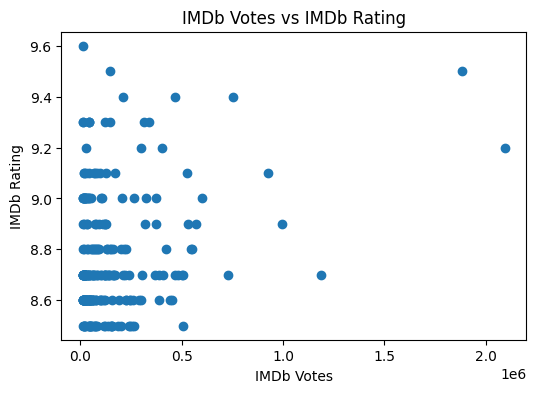

In [199]:
#scatter plot : votes vs IMDb ratings
plt.figure(figsize = (6, 4))
plt.scatter(df_cleaned['imbd_votes'], df_cleaned['imbd_rating'])
plt.xlabel('IMDb Votes')
plt.ylabel('IMDb Rating')
plt.title('IMDb Votes vs IMDb Rating')
plt.show()

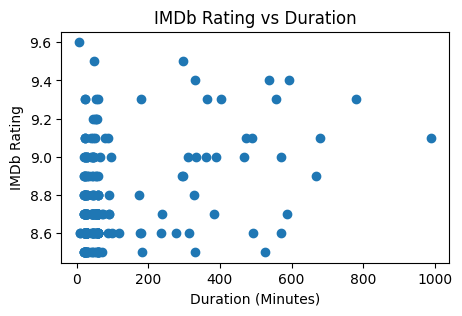

In [200]:
#Scatter plot : imbd_ratings and duration
plt.figure(figsize = (5, 3))
plt.scatter(df_cleaned['duration_minutes'], df_cleaned['imbd_rating'])
plt.xlabel('Duration (Minutes)')
plt.ylabel('IMDb Rating')
plt.title('IMDb Rating vs Duration')
plt.show()

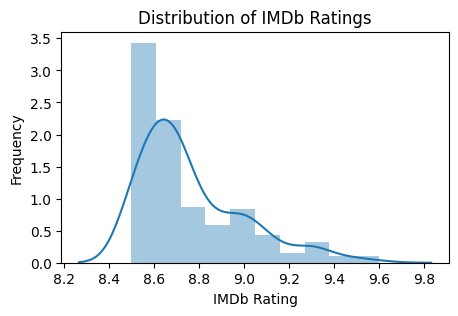

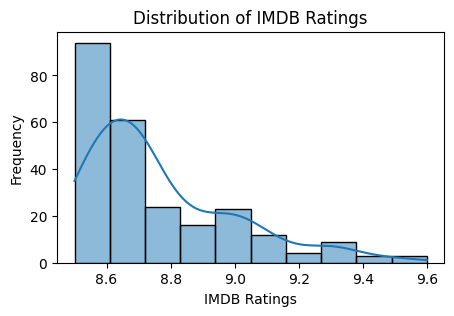

In [201]:
#Distribuation plot for imbd_ratings
plt.figure(figsize = (5, 3))
sns.distplot(df_cleaned['imbd_rating'], bins = 10, kde = True)
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Ratings')
plt.show()

plt.figure(figsize = (5, 3))
sns.histplot(df_cleaned['imbd_rating'], bins = 10, kde = True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Ratings')
plt.ylabel('Frequency')
plt.show()

In [202]:
duplicates = df_cleaned.columns[df_cleaned.columns.duplicated()]
print("Duplicate Columns:", duplicates)

Duplicate Columns: Index([], dtype='object')


In [203]:
# Average IMDB Rating by Genre (Top 10 by frequency)
genre_columns = genre_dummies.columns
genre_counts = df_cleaned[genre_columns].sum().sort_values(ascending = False).head(10)
avg_ratings = {genre : df_cleaned[df_cleaned[genre] == 1]['imbd_rating'].mean() for genre in genre_counts.index}
print(avg_ratings)

{'Drama': np.float64(8.758823529411766), 'Comedy': np.float64(8.71264367816092), 'Action': np.float64(8.720370370370372), 'Adventure': np.float64(8.777358490566039), 'Crime': np.float64(8.73846153846154), 'Animation': np.float64(8.763461538461538), 'Documentary': np.float64(8.970370370370372), 'Mystery': np.float64(8.691666666666666), 'Thriller': np.float64(8.825), 'History': np.float64(8.946666666666665)}


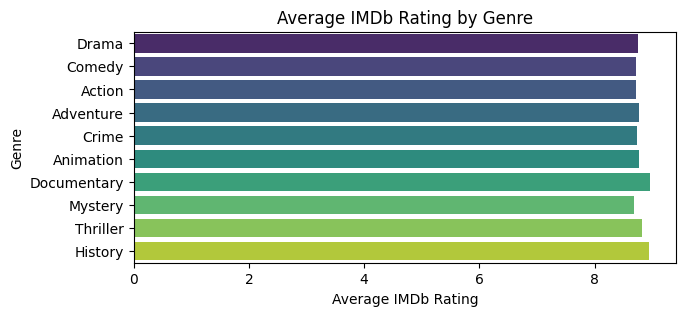

In [204]:
#plot : Average IMDB Rating by Genre
plt.figure(figsize = (7,3))
sns.barplot(y = list(avg_ratings.keys()), x = list(avg_ratings.values()), palette = 'viridis')
plt.ylabel('Genre')
plt.xlabel('Average IMDb Rating')
plt.title('Average IMDb Rating by Genre')
plt.show()

In [205]:
# Creating the function
def category_year(year):
  if 1990 <= year <= 2000:
    return '1990s'
  elif 2000 <= year <= 2010:
    return '2000s'
  elif 2010 <= year <= 2020:
    return '2010s'
  elif 2020 <= year <= 2025:
    return '2020s'
  else:
    return 'Other'

In [206]:
# Creating a column with name 'year_range'
df_cleaned['year_range'] = df_cleaned['year'].apply(category_year)
df_cleaned.head()

,rank,show_id,year,link,imbd_votes,imbd_rating,cast_id,cast_name,director_id,director_name,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,year_range
0,1,tt5491994,2016,https://www.imdb.com/title/tt5491994,145597,9.5,"nm0041003,nm1769336,nm0118096,nm2357454,nm4830...","David Attenborough,Chadden Hunter,Gordon Bucha...","nm1565498,nm3482115,nm4830788,nm1769336,nm2139...","Justin Anderson,Ed Charles,Fredi Devas,Chadden...",...,0,0,0,0,0,0,0,0,0,2010s
1,2,tt0903747,2008,https://www.imdb.com/title/tt0903747,1881190,9.5,"nm0186505,nm0348152,nm0666739,nm1336827,nm2666...","Bryan Cranston,Anna Gunn,Aaron Paul,Betsy Bran...","nm0533713,nm0002835,nm0319213,nm0118778,nm0806...","Michelle MacLaren,Adam Bernstein,Vince Gilliga...",...,0,0,0,0,0,0,1,0,0,2000s
2,3,tt0795176,2006,https://www.imdb.com/title/tt0795176,210164,9.4,"nm0000244,nm0041003,nm0238419,nm2898035,nm8603...","Sigourney Weaver,David Attenborough,Nikolay Dr...","nm0288144,nm1768412","Alastair Fothergill,Mark Linfield",...,0,0,0,0,0,0,0,0,0,2000s
3,4,tt0185906,2001,https://www.imdb.com/title/tt0185906,469081,9.4,"nm0342241,nm0507073,nm0515296,nm0853169,nm0005...","Scott Grimes,Damian Lewis,Ron Livingston,Shane...","nm0291205,nm0004121,nm0000158,nm0500896,nm0518...","David Frankel,Mikael Salomon,Tom Hanks,David L...",...,0,0,0,0,0,0,0,1,0,2000s
4,5,tt7366338,2019,https://www.imdb.com/title/tt7366338,751884,9.4,"nm2976580,nm0364813,nm0001745,nm1835523,nm0001...","Jessie Buckley,Jared Harris,Stellan Skarsgård,...",nm0719307,Johan Renck,...,0,0,0,0,0,0,1,0,0,2010s


In [207]:
# One Hot Encode the "year_range"
year_range_dummies = pd.get_dummies(df_cleaned['year_range'], prefix = 'year')
year_range_dummies = year_range_dummies.replace({False : 0 , True : 1})
df_cleaned = pd.concat([df_cleaned, year_range_dummies], axis = 1)
df_cleaned.head()

,rank,show_id,year,link,imbd_votes,imbd_rating,cast_id,cast_name,director_id,director_name,...,Talk-Show,Thriller,War,Western,year_range,year_1990s,year_2000s,year_2010s,year_2020s,year_Other
0,1,tt5491994,2016,https://www.imdb.com/title/tt5491994,145597,9.5,"nm0041003,nm1769336,nm0118096,nm2357454,nm4830...","David Attenborough,Chadden Hunter,Gordon Bucha...","nm1565498,nm3482115,nm4830788,nm1769336,nm2139...","Justin Anderson,Ed Charles,Fredi Devas,Chadden...",...,0,0,0,0,2010s,0,0,1,0,0
1,2,tt0903747,2008,https://www.imdb.com/title/tt0903747,1881190,9.5,"nm0186505,nm0348152,nm0666739,nm1336827,nm2666...","Bryan Cranston,Anna Gunn,Aaron Paul,Betsy Bran...","nm0533713,nm0002835,nm0319213,nm0118778,nm0806...","Michelle MacLaren,Adam Bernstein,Vince Gilliga...",...,0,1,0,0,2000s,0,1,0,0,0
2,3,tt0795176,2006,https://www.imdb.com/title/tt0795176,210164,9.4,"nm0000244,nm0041003,nm0238419,nm2898035,nm8603...","Sigourney Weaver,David Attenborough,Nikolay Dr...","nm0288144,nm1768412","Alastair Fothergill,Mark Linfield",...,0,0,0,0,2000s,0,1,0,0,0
3,4,tt0185906,2001,https://www.imdb.com/title/tt0185906,469081,9.4,"nm0342241,nm0507073,nm0515296,nm0853169,nm0005...","Scott Grimes,Damian Lewis,Ron Livingston,Shane...","nm0291205,nm0004121,nm0000158,nm0500896,nm0518...","David Frankel,Mikael Salomon,Tom Hanks,David L...",...,0,0,1,0,2000s,0,1,0,0,0
4,5,tt7366338,2019,https://www.imdb.com/title/tt7366338,751884,9.4,"nm2976580,nm0364813,nm0001745,nm1835523,nm0001...","Jessie Buckley,Jared Harris,Stellan Skarsgård,...",nm0719307,Johan Renck,...,0,1,0,0,2010s,0,0,1,0,0


In [208]:
#Dropping irrelevant features from the data
df_cleaned = df_cleaned.drop(['year', 'year_range'], axis = 1)
df_cleaned.head()

,rank,show_id,link,imbd_votes,imbd_rating,cast_id,cast_name,director_id,director_name,writer_id,...,Sport,Talk-Show,Thriller,War,Western,year_1990s,year_2000s,year_2010s,year_2020s,year_Other
0,1,tt5491994,https://www.imdb.com/title/tt5491994,145597,9.5,"nm0041003,nm1769336,nm0118096,nm2357454,nm4830...","David Attenborough,Chadden Hunter,Gordon Bucha...","nm1565498,nm3482115,nm4830788,nm1769336,nm2139...","Justin Anderson,Ed Charles,Fredi Devas,Chadden...",nm2357454,...,0,0,0,0,0,0,0,1,0,0
1,2,tt0903747,https://www.imdb.com/title/tt0903747,1881190,9.5,"nm0186505,nm0348152,nm0666739,nm1336827,nm2666...","Bryan Cranston,Anna Gunn,Aaron Paul,Betsy Bran...","nm0533713,nm0002835,nm0319213,nm0118778,nm0806...","Michelle MacLaren,Adam Bernstein,Vince Gilliga...","nm0319213,nm0332467,nm2297407,nm1028558,nm0909...",...,0,0,1,0,0,0,1,0,0,0
2,3,tt0795176,https://www.imdb.com/title/tt0795176,210164,9.4,"nm0000244,nm0041003,nm0238419,nm2898035,nm8603...","Sigourney Weaver,David Attenborough,Nikolay Dr...","nm0288144,nm1768412","Alastair Fothergill,Mark Linfield","nm0041003,nm1761192,nm0288144,nm0662263",...,0,0,0,0,0,0,1,0,0,0
3,4,tt0185906,https://www.imdb.com/title/tt0185906,469081,9.4,"nm0342241,nm0507073,nm0515296,nm0853169,nm0005...","Scott Grimes,Damian Lewis,Ron Livingston,Shane...","nm0291205,nm0004121,nm0000158,nm0500896,nm0518...","David Frankel,Mikael Salomon,Tom Hanks,David L...","nm0024421,nm0096897,nm0296861,nm0000158,nm0420...",...,0,0,0,1,0,0,1,0,0,0
4,5,tt7366338,https://www.imdb.com/title/tt7366338,751884,9.4,"nm2976580,nm0364813,nm0001745,nm1835523,nm0001...","Jessie Buckley,Jared Harris,Stellan Skarsgård,...",nm0719307,Johan Renck,nm0563301,...,0,0,1,0,0,0,0,1,0,0


In [209]:
#importing important libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [210]:
#splitting and scaling
X = df_cleaned.drop(['imbd_rating'], axis = 1)
y = df_cleaned['imbd_rating']

In [211]:
#performing the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [212]:
#normalize numeric features
scaler = StandardScaler()
numeric_cols = ['duration_minutes', 'imbd_votes', 'rank']

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [213]:
#model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor

In [214]:
#Dropping non numeric columns
X_train = X_train.select_dtypes(include = ['number'])
X_test = X_test.select_dtypes(include = ['number'])

In [215]:
#Initialize the model
lr_model = LinearRegression()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

In [216]:
# Training the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [217]:
# Taking predictions from the model on testing data
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

In [218]:
# Importing important libraries
from sklearn.metrics import mean_squared_error, r2_score

In [219]:
# Compute Metrics
def evaluate_model(y_true, y_pred, model_name):
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)
  return {
      'Model' : model_name,
      'MSE' : mse,
      'RMSE' : rmse,
      'R2 Score' : r2
  }

In [220]:
# Evaluate the models
results = [
    evaluate_model(y_test, lr_pred, 'Linear Regression'),
    evaluate_model(y_test, rf_pred, 'Random Forest'),
    evaluate_model(y_test, gb_pred, 'Gradient Boosting')
]
results_df = pd.DataFrame(results)
results_df.head()

,Model,MSE,RMSE,R2 Score
0,Linear Regression,0.021356,0.146136,0.629243
1,Random Forest,0.016403,0.128075,0.715222
2,Gradient Boosting,0.015024,0.122570,0.739175


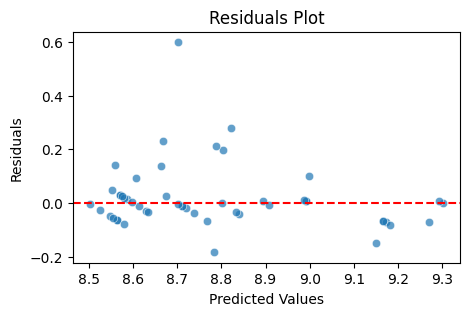

In [221]:
# Residuals plot for best model (e.g, Gradient Boosting Regressor)
residuals = y_test - gb_pred
plt.figure(figsize = (5, 3))
sns.scatterplot(x = gb_pred, y = residuals, alpha = 0.7)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [222]:
# Importing important libraries'
from sklearn.model_selection import GridSearchCV

# Parameters Grid
param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'learning_rate' : [0.001, 0.005, 0.01, 0.05, 0.1]
}

# Initializing Grid Search
grid_search = GridSearchCV(estimator = GradientBoostingRegressor(),
                           param_grid = param_grid, cv = 5,
                           scoring = 'r2', n_jobs = -1)

# Fitting the data
grid_search.fit(X_train, y_train)

# Best Parameters
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [223]:
#Creating the optimal model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print('Best Parameters :', grid_search.best_params_)
print('R2 Score :', np.round(r2_score(y_test, y_pred_best), 3))

Best Parameters : {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
R2 Score : 0.731


In [224]:
#create a parameter dictionary with more combinations of hyper-parameters
# Define your model
model = RandomForestRegressor(random_state=42)

# Expanded parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='r2'
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print('Best Parameters:', grid_search.best_params_)
print('R2 Score:', np.round(r2_score(y_test, y_pred_best), 3))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R2 Score: 0.698


In [225]:
# Model Interpretation
# Extract the feature importances
feature_importances = pd.Series(best_model.feature_importances_, index = X_train.columns)
top_features = feature_importances.sort_values(ascending = False).head(10)
print(top_features)

rank                0.446883
imbd_votes          0.162449
duration_minutes    0.126122
Documentary         0.032353
Family              0.022313
Drama               0.018799
History             0.016184
Comedy              0.015130
year_2000s          0.014595
year_2010s          0.013891
dtype: float64


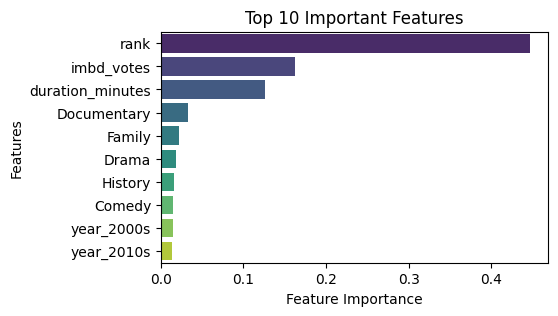

In [226]:
# Plot the top 10 important features
plt.figure(figsize = (5, 3))
sns.barplot(x = top_features.values, y = top_features.index, palette = 'viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [227]:
#importing the necesarry libraries
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import numpy as np

In [228]:
# STEP 1: Identify categorical feature column names or indices
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [229]:
# STEP 2: Define CatBoost model (don't use verbose logging inside GridSearchCV to avoid spam)
model = CatBoostRegressor(
    silent=True,  # suppress output
    random_state=42
)

In [230]:
# STEP 3: Expanded hyperparameter grid
param_grid = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 300, 500],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}

In [231]:
# STEP 4: Use Pool to explicitly specify categorical features
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, cat_features=categorical_features)

In [232]:
# STEP 5: Wrap in GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

In [233]:
# STEP 6: Fit the model (GridSearch will internally use CatBoost's handling of categoricals)
grid_search.fit(X_train, y_train, cat_features=categorical_features)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7b9749783990>,
             n_jobs=-1,
             param_grid={'border_count': [32, 64, 128], 'depth': [4, 6, 8, 10],
                         'iterations': [100, 300, 500],
                         'l2_leaf_reg': [1, 3, 5, 7],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='r2', verbose=2)

In [234]:
# STEP 7: Predict and evaluate
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print('Best Parameters:', grid_search.best_params_)
print('R2 Score:', np.round(r2_score(y_test, y_pred_best), 3))

Best Parameters: {'border_count': 128, 'depth': 4, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.05}
R2 Score: 0.731
